In [0]:
import os ; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/Unsupervised Learning')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [0]:

#define the centre of each gaussian cloud
centers = np.array([
    [ 1,  1,  1],
    [ 1,  1, -1],
    [ 1, -1,  1],
    [ 1, -1, -1],
    [-1,  1,  1],
    [-1,  1, -1],
    [-1, -1,  1],
    [-1, -1, -1],
])*3



In [0]:
# create the clouds, Gaussian samples centred at 
# each of the centres we just made 
data = []
pts_per_cloud = 100   

for c in centers:
    cloud = np.random.randn(pts_per_cloud, 3) + c
    data.append(cloud)

In [0]:
data[1][0:4]

array([[ 2.84599953,  3.88240592, -4.50982965],
       [ 3.48744768,  2.02824212, -2.19546744],
       [ 2.63987924,  1.36819011, -1.7616    ],
       [ 1.14414375,  3.89138196, -3.47823769]])

In [0]:
data = np.concatenate(data) 

In [0]:
data

array([[ 3.08416599,  3.12309885,  3.75037359],
       [ 3.50871517,  2.0908691 ,  3.54461208],
       [ 3.84650258,  2.7244456 ,  2.656327  ],
       ...,
       [-2.96741034, -2.59426713, -1.85118394],
       [-0.68217228, -4.38769399, -2.49302836],
       [-3.75836039, -3.1745501 , -2.76696192]])

In [0]:
len(centers)

8

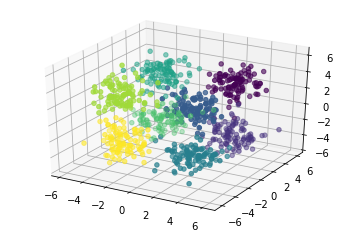

In [0]:
#visualize the cloud in 3-D
#add colors / labels so we can track where the points go
colors = np.array([[i]* pts_per_cloud for i in range(len(centers))]).flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=colors)
plt.show()

In [0]:
#perform dimensionality reduction
#t-SNE
tsne = TSNE()
transformed = tsne.fit_transform(data)

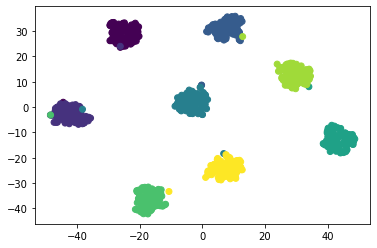

In [0]:
#visualize the clouds in 2-D
plt.scatter(transformed[:,0], transformed[:,1], c=colors)
plt.show()

In [0]:
#cluster properties are kept intact even after the transformation.
#clusters are clearly formed, but distance between each clusters is not totally preserved as some information
#gets lost in transforming from 3-D to 2-D